In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/celebal internship/air quality index/one_month_kolkata.csv')
df.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,63,85.0,2023-07-03:18,4.0,35.0,26.0,18.0,16.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,76,94.7,2023-07-03:17,4.7,34.7,29.0,24.0,18.3,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,76,104.3,2023-07-03:16,5.3,34.3,32.0,24.0,20.7,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,67,114.0,2023-07-03:15,6.0,34.0,35.0,20.0,23.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,67,103.3,2023-07-03:14,5.3,38.3,34.3,20.0,24.0,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800


<Axes: >

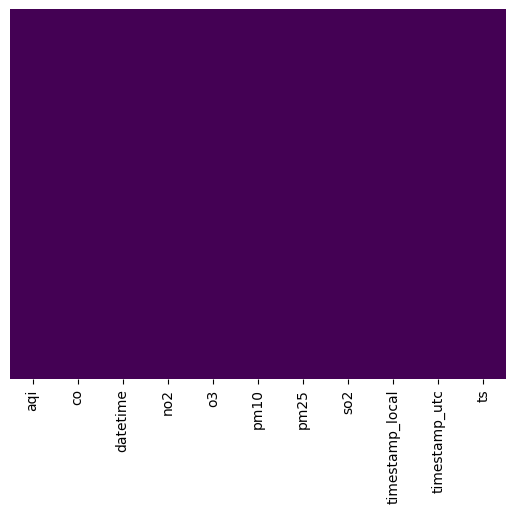

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              721 non-null    int64  
 1   co               721 non-null    float64
 2   datetime         721 non-null    object 
 3   no2              721 non-null    float64
 4   o3               721 non-null    float64
 5   pm10             721 non-null    float64
 6   pm25             721 non-null    float64
 7   so2              721 non-null    float64
 8   timestamp_local  721 non-null    object 
 9   timestamp_utc    721 non-null    object 
 10  ts               721 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 62.1+ KB


In [7]:
y=df.iloc[:,0] ## dependent features
y

0       63
1       76
2       76
3       67
4       67
      ... 
716    104
717    129
718    107
719    123
720    129
Name: aqi, Length: 721, dtype: int64

In [8]:
df.columns

Index(['aqi', 'co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts'],
      dtype='object')

In [9]:
X=df[['co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts']] ## independent features

In [10]:
X

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,85.0,2023-07-03:18,4.0,35.0,26.0,18.00,16.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,94.7,2023-07-03:17,4.7,34.7,29.0,24.00,18.3,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,104.3,2023-07-03:16,5.3,34.3,32.0,24.00,20.7,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,114.0,2023-07-03:15,6.0,34.0,35.0,20.00,23.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,103.3,2023-07-03:14,5.3,38.3,34.3,20.00,24.0,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800
...,...,...,...,...,...,...,...,...,...,...
716,130.7,2023-06-03:22,6.0,72.7,41.7,37.00,36.0,2023-06-04T03:30:00,2023-06-03T22:00:00,1685829600
717,129.0,2023-06-03:21,5.0,75.0,42.0,31.50,35.0,2023-06-04T02:30:00,2023-06-03T21:00:00,1685826000
718,132.3,2023-06-03:20,7.7,72.7,43.0,38.00,37.0,2023-06-04T01:30:00,2023-06-03T20:00:00,1685822400
719,135.7,2023-06-03:19,10.3,70.3,44.0,44.00,39.0,2023-06-04T00:30:00,2023-06-03T19:00:00,1685818800


In [11]:
X.isnull()

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
716,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False,False,False,False


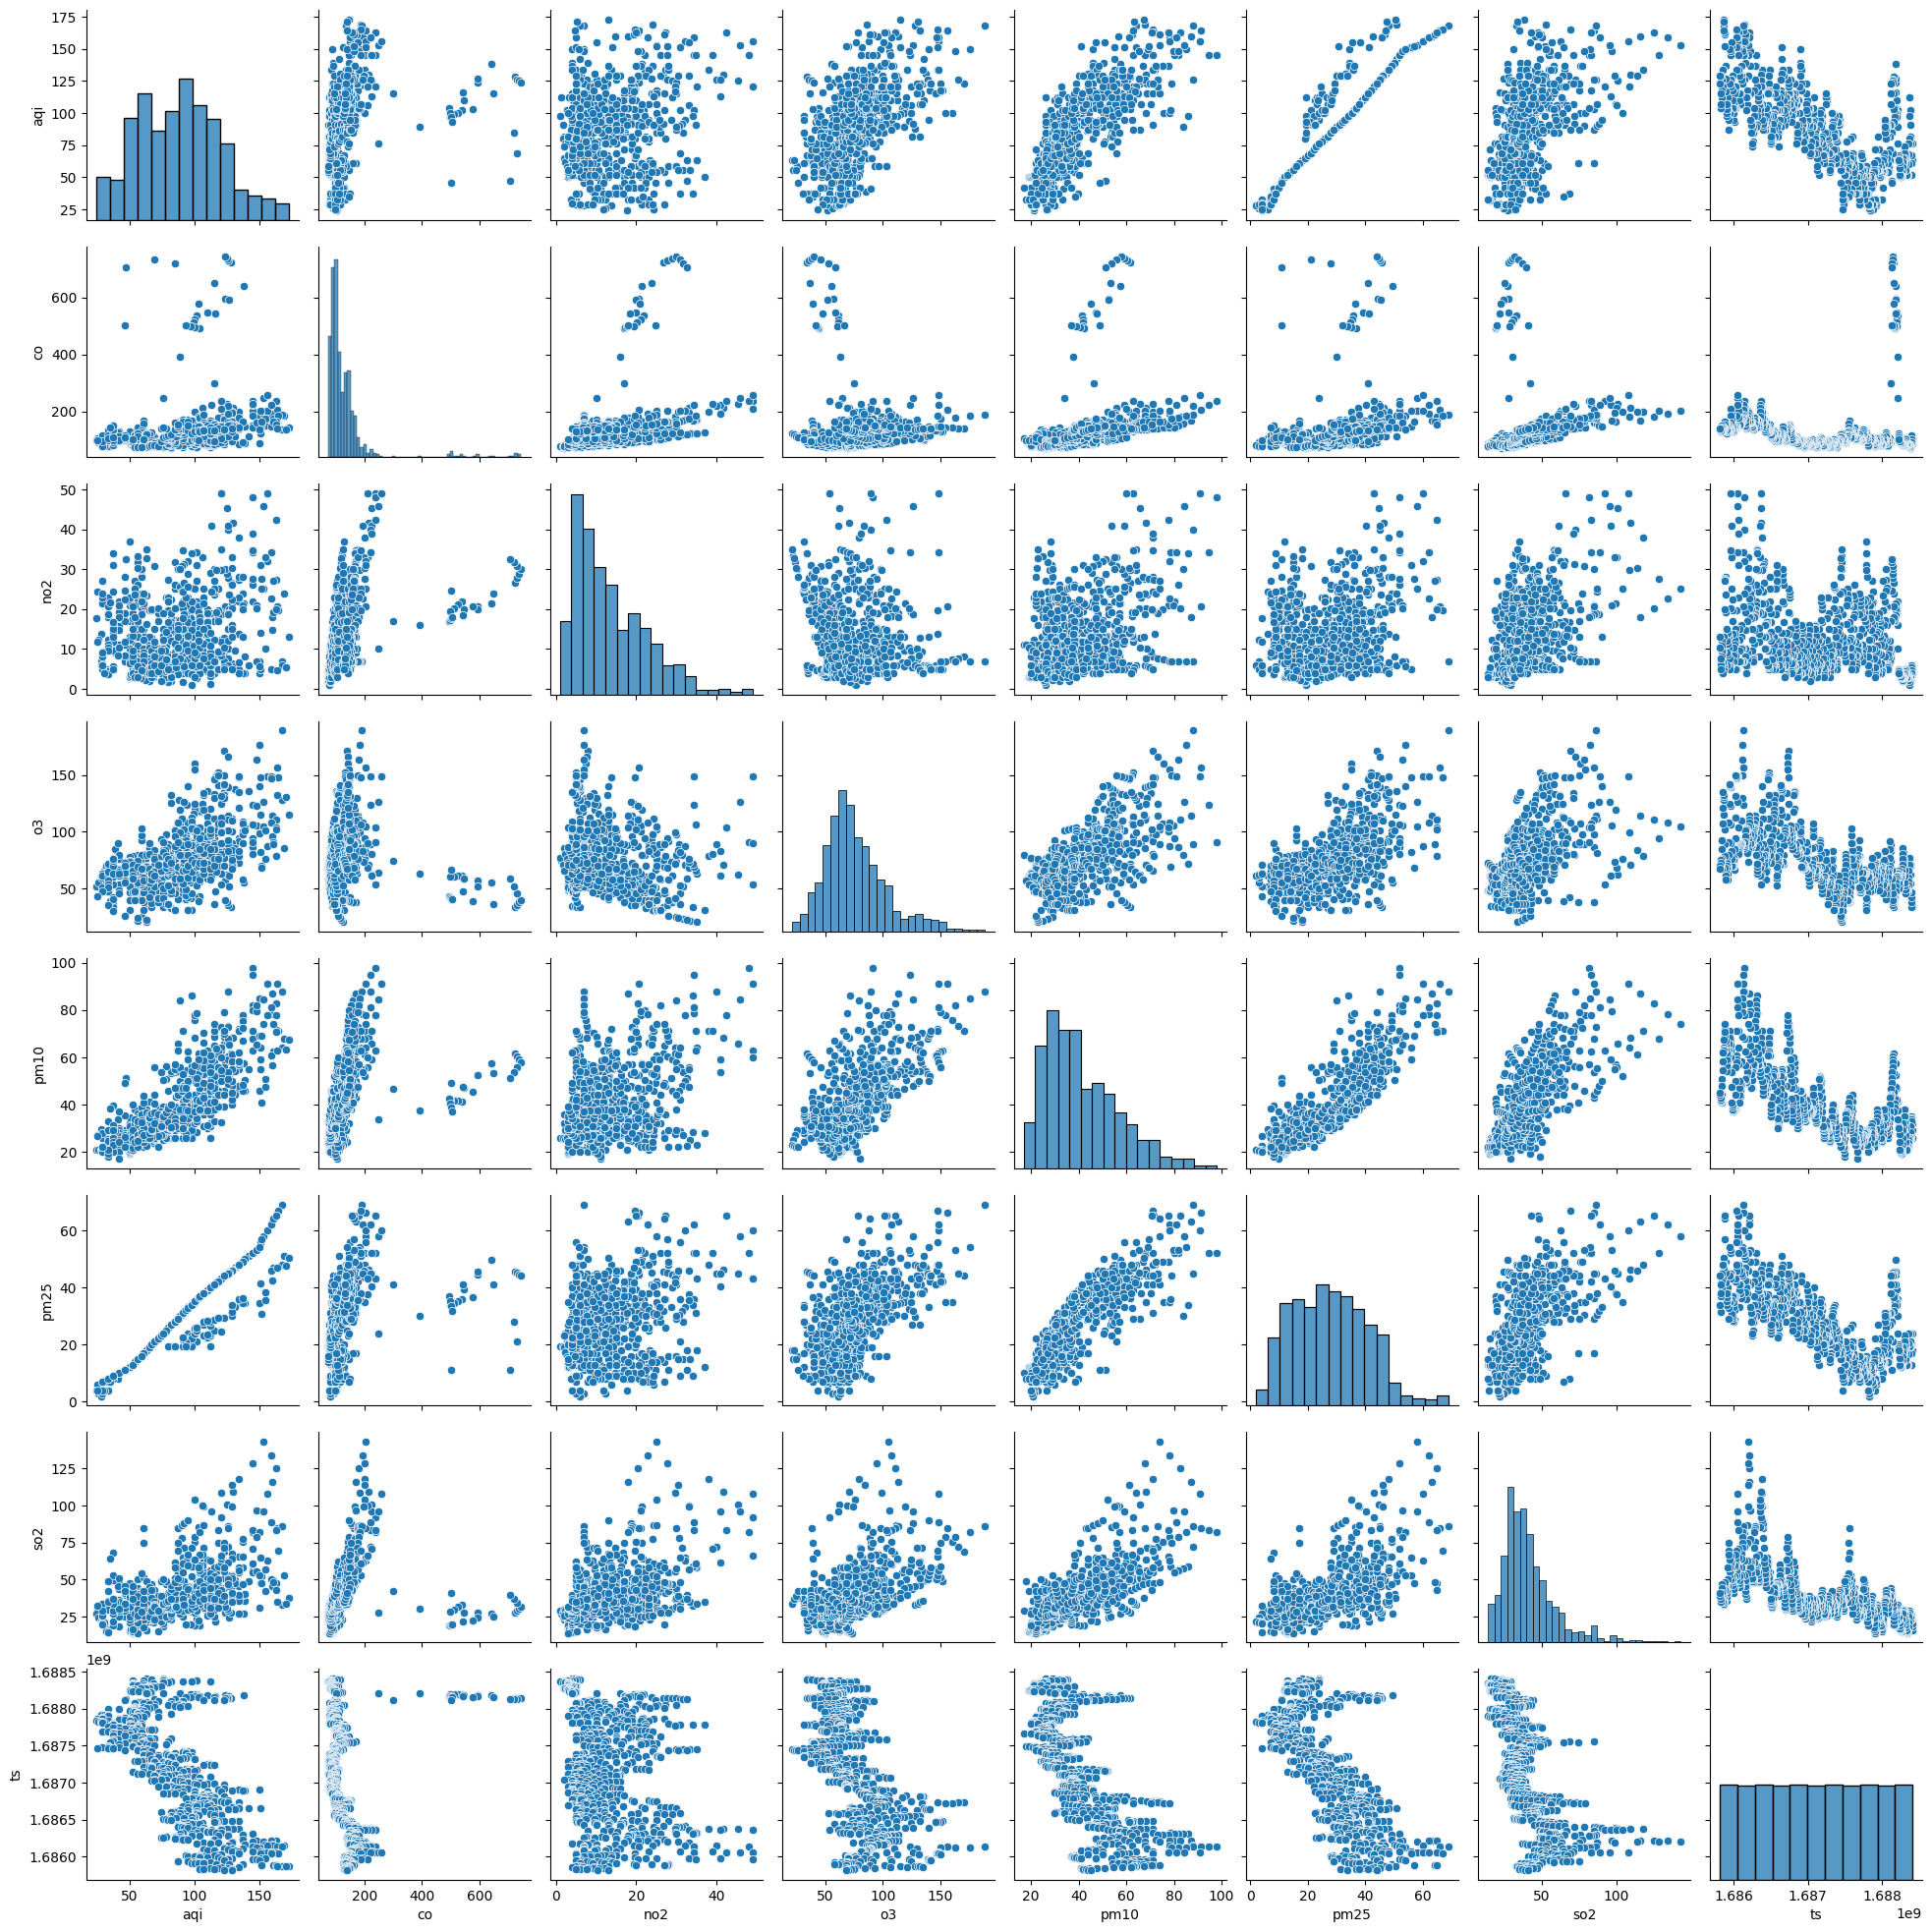

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,aqi,co,no2,o3,pm10,pm25,so2,ts
aqi,1.000000,0.292317,0.210719,0.593923,0.799332,0.954578,0.556691,-0.704605
co,0.292317,1.000000,0.411539,-0.024638,0.363920,0.329419,0.175564,0.015674
no2,0.210719,0.411539,1.000000,-0.194854,0.366779,0.257192,0.491404,-0.193705
o3,0.593923,-0.024638,-0.194854,1.000000,0.662954,0.611106,0.506314,-0.594586
pm10,0.799332,0.363920,0.366779,0.662954,1.000000,0.855849,0.723465,-0.696906
pm25,0.954578,0.329419,0.257192,0.611106,0.855849,1.000000,0.609291,-0.714083
so2,0.556691,0.175564,0.491404,0.506314,0.723465,0.609291,1.000000,-0.634208
ts,-0.704605,0.015674,-0.193705,-0.594586,-0.696906,-0.714083,-0.634208,1.000000


<ipython-input-14-eb5df078eb6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


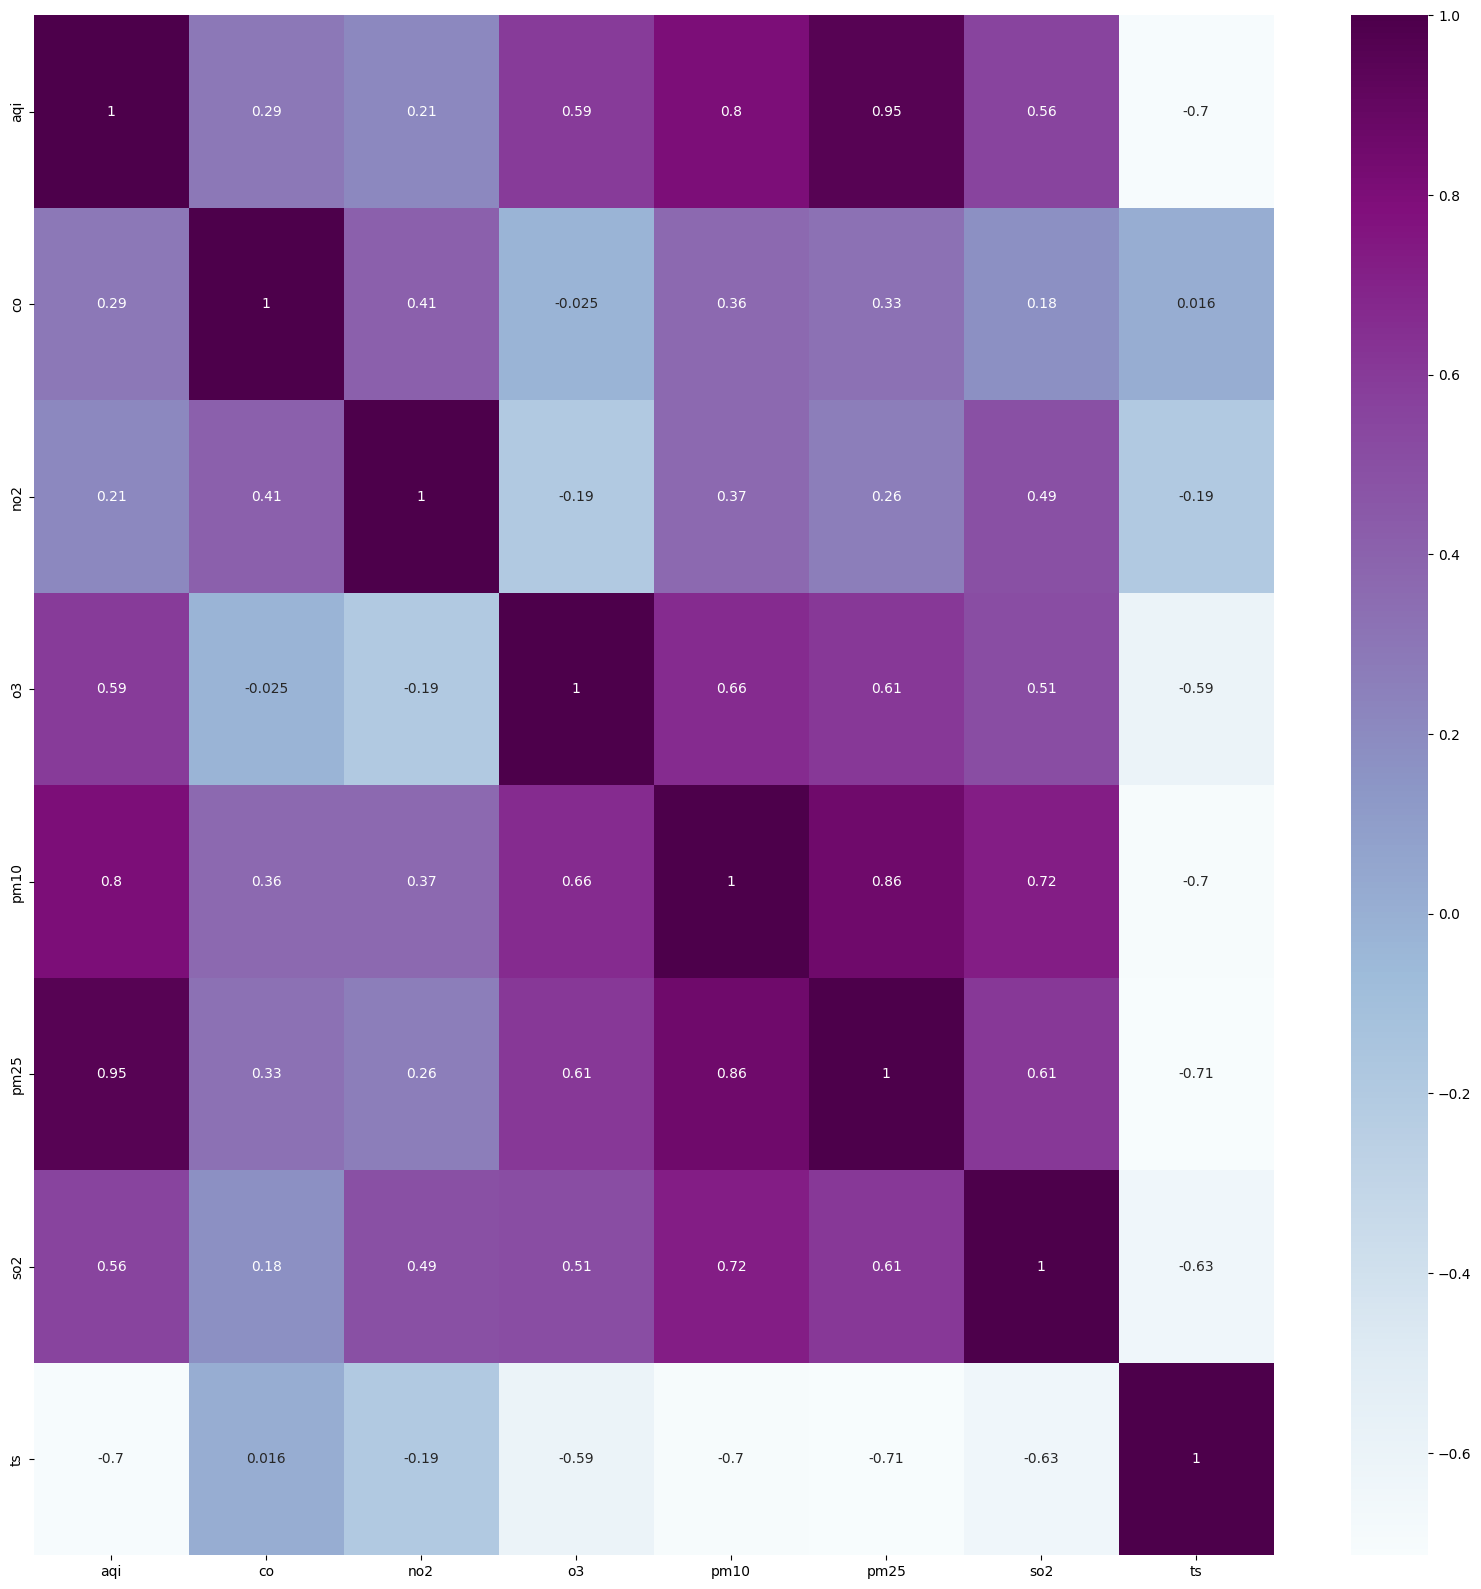

In [14]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")

In [15]:
corrmat.index

Index(['aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'ts'], dtype='object')

In [16]:
X = X.drop(['datetime'],axis=1)
X = X.drop(['timestamp_local'],axis=1)
X = X.drop(['timestamp_utc'],axis=1)
X.head()

,co,no2,o3,pm10,pm25,so2,ts
0,85.0,4.0,35.0,26.0,18.0,16.0,1688407200
1,94.7,4.7,34.7,29.0,24.0,18.3,1688403600
2,104.3,5.3,34.3,32.0,24.0,20.7,1688400000
3,114.0,6.0,34.0,35.0,20.0,23.0,1688396400
4,103.3,5.3,38.3,34.3,20.0,24.0,1688392800


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[0.01837593 0.0093992  0.01960545 0.15243289 0.61355613 0.01102921
 0.17560118]


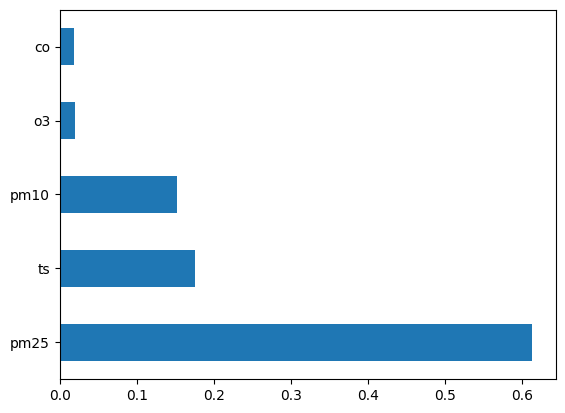

In [18]:
X.head()

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [21]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-109.78615466495239


In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e+04, tolerance: 6.150e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+04, tolerance: 4.764e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.199e+04, tolerance: 7.003e

{'alpha': 1}
-103.96420728600364


<ipython-input-23-62201203c3f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='aqi', ylabel='Density'>

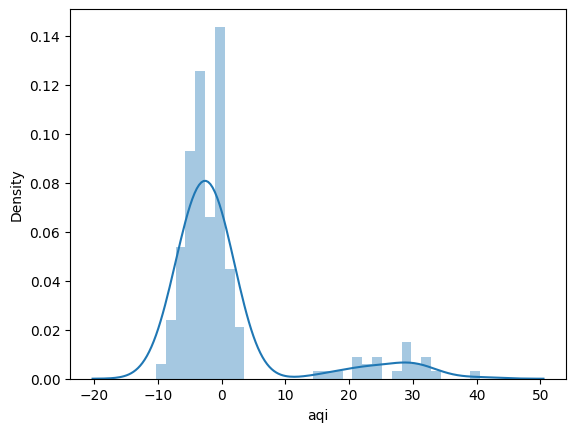

In [23]:
prediction=lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction)

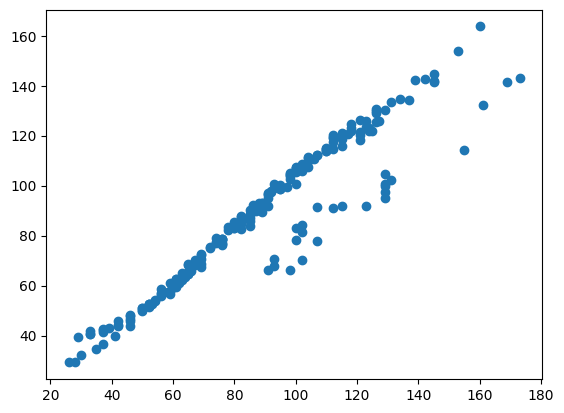

In [24]:
plt.scatter(y_test,prediction)

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.654222108360758
MSE: 94.17988093077453
RMSE: 9.70463193175169
